# 平面グラフをy軸で回転させた立体の描画

## 平面グラフの表示

In [2]:
%matplotlib notebook
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# 関数の設定

# 定義域
# x_dom = [0, 2]
dom_d = [0, 1]

def base_func(x):
    y = -2 * x + 4
    return y

def curve(t):
    x = 4 * t
    y = -1 * x + 4
    return (x, y)

def curve_2(t):
    c1 = t[np.any(t < 0.5)]
    x1 = 2 * c1
    y1 = -4 * c1 + 4

    c2 = t[np.any(t >= 0.5)]
    x2 = 2 - 2 * c2
    y2 = 0 * c2 + 2
    
    x = np.concatenate([x1, x2], 1)
    y = np.concatenate([y1, y2], 1)

    return (x, y)

# グラフの描画範囲
dom_graph = {
    "x": [- 1, 3],
    "y": [-1, 5],
    "X": [-3, 3],
    "Y": [-3, 3],
    "Z": [0, 4],
}

# グリッド分割数
grid = 51

In [12]:
# curve(t)
# curve_2(t)

<IPython.core.display.Javascript object>


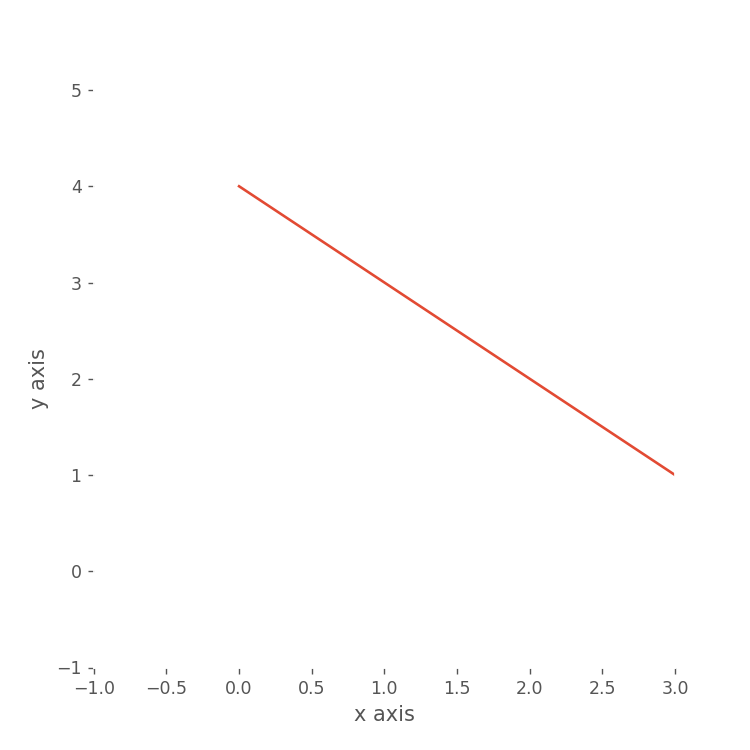

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# x = np.linspace(*x_dom, grid)
# y = base_func(x)

t = np.linspace(*dom_d, grid)
x, y = curve(t)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_xlim(*dom_graph["x"])
ax.set_ylim(*dom_graph["y"])
# ax.set_xlim(np.min(x), np.max(x))
# ax.set_ylim(np.min(y), np.max(y))
ax.grid()

ax.plot(x, y)

In [15]:
x, y = curve(t)
np.shape(t), np.shape(x), np.shape(y)

((51,), (51,), (51,))

## 回転体の作成

In [16]:
_theta = np.linspace(0, 2 * np.pi, grid)
# theta, R, Z = np.meshgrid(theta, x, y)
theta, T = np.meshgrid(_theta, t)

R, Z = curve(T)

print(R.shape, Z.shape, T.shape)

print(t)
print(T)

T[np.any(T < 0.5)]

# X = R * np.cos(theta)
# Y = R * np.sin(theta)
# Z = T * 0 + Z

# print(X.shape, Y.shape, Z.shape)

# R, Z = curve_2(T)

# print(R.shape, Z.shape, T.shape)

# X = R * np.cos(theta)
# Y = R * np.sin(theta)
# Z = T * 0 + Z

# print(X.shape, Y.shape, Z.shape)

(51, 51) (51, 51) (51, 51)
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [0.96 0.96 0.96 ... 0.96 0.96 0.96]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [1.   1.   1.   ... 1.   1.   1.  ]]


array([[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        ...,
        [0.96, 0.96, 0.96, ..., 0.96, 0.96, 0.96],
        [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
        [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]]])

(51, 51) (51, 51) (51, 51)
(51, 51) (51, 51) (51, 51)


<IPython.core.display.Javascript object>


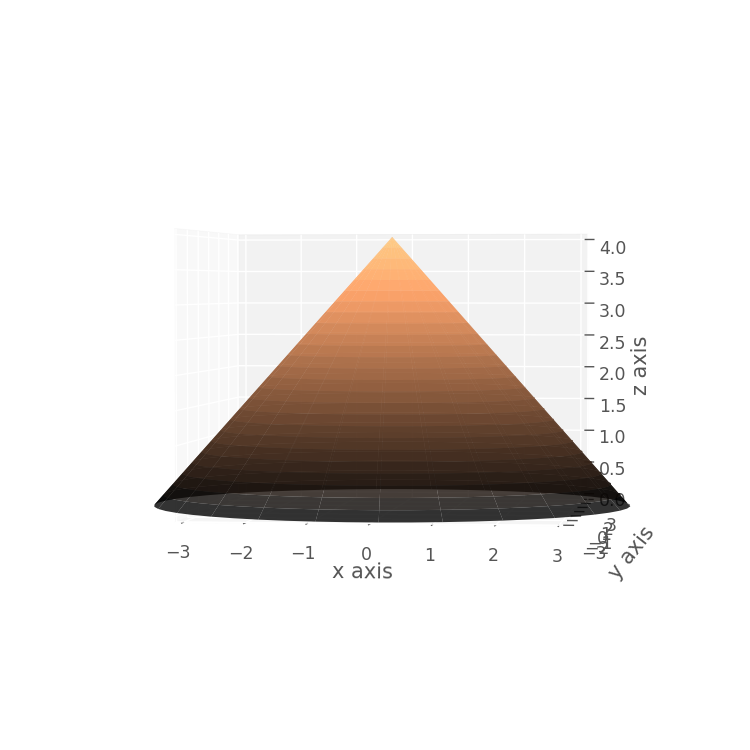

In [17]:
_theta = np.linspace(0, 2 * np.pi, grid)
# theta, R, Z = np.meshgrid(theta, x, y)
theta, T = np.meshgrid(_theta, t)

R, Z = curve(T)

print(R.shape, Z.shape, T.shape)

X = R * np.cos(theta)
Y = R * np.sin(theta)
Z = T * 0 + Z

# thres = int(grid * 1)
# X = X[:, :thres]
# Y = Y[:, :thres]
# Z = Z[:, :thres]

print(X.shape, Y.shape, Z.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim(*dom_graph["X"])
ax.set_ylim(*dom_graph["Y"])
ax.set_zlim(*dom_graph["Z"])
#ax.set_aspect('equal')

ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)
plt.show()

In [8]:
def plot_rev(rotation):
    _theta = np.linspace(0, 2 * np.pi, grid)
    # theta, R, Z = np.meshgrid(theta, x, y)
    theta, T = np.meshgrid(_theta, t)

    R, Z = curve(T)

    X = R * np.cos(theta)
    Y = R * np.sin(theta)
    Z = Z
    
    thres = int(grid * rotation)
    X = X[:, :thres]
    Y = Y[:, :thres]
    Z = Z[:, :thres]
    
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    ax.set_xlim(*dom_graph["X"])
    ax.set_ylim(*dom_graph["Y"])
    ax.set_zlim(*dom_graph["Z"])
    #ax.set_aspect('equal')

    return ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)
#     return (X, Y, Z)

In [9]:
plot_rev(1)
plt.show()

<IPython.core.display.Javascript object>


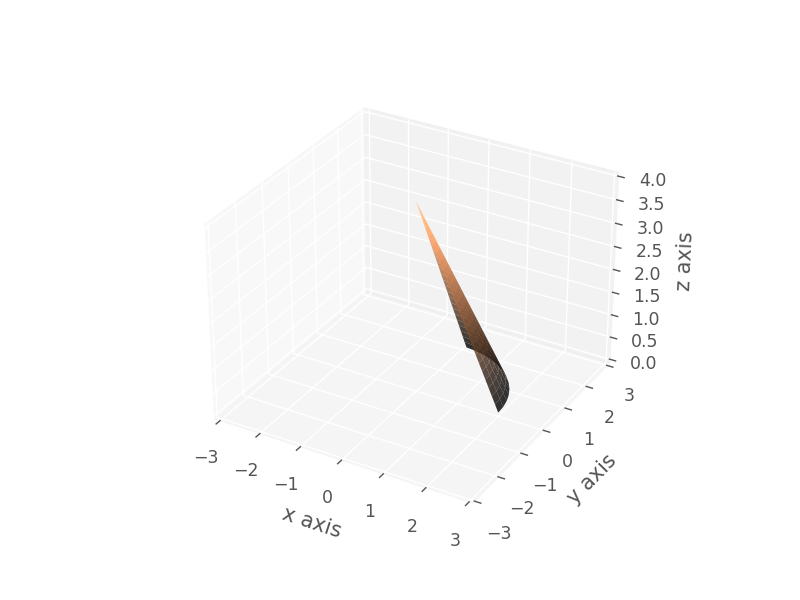

In [10]:
# アニメーションサンプル
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
plt.style.use('ggplot')
plt.rcParams["axes.facecolor"] = 'white'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = axes3d.get_test_data(0.1)

frame_max = 100

def init():
#     ax.plot_wireframe(X, Y, Z, rcount=12, ccount=12)
    plot_rev(1 / frame_max)
    return fig,

def animate(i):
    ax.cla()
#     ax.view_init(elev=30., azim=3.6*i)
    plot_rev((i + 1) / frame_max)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(frame_max), interval=50, blit=False)    
# ani.save('rotate_3dwf.mp4', dpi=100)
# HTML(ani.to_html5_video())
plt.show()

In [275]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ims = []

# for i in range(100):
    
# #     img = ax.plot_surface(*plot_rev(i + 1 / 100), alpha=0.8, cmap=cm.copper)
#     img = plot_rev(i + 1 / 100)
 
#     ims.append(img) # グラフを配列に追加
 
# # 100枚のプロットを 100ms ごとに表示するアニメーション
# ani = animation.ArtistAnimation(fig, ims, interval=100)
# plt.show()